# Лабораторная работа №6
Группа 45/2
---

**Импорт библиотек**

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Загрузка данных**

In [205]:
data = pd.read_csv('Customers.csv')

**Задание 1.**
Вывести первые и последние 10 строк таблицы (head(), tail()).

In [206]:
# Вывод первых 10 строк
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [207]:
# Вывод последних 10 строк
data.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


**Задание 2.**
Вывести статистику по значениям признаков.

In [208]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Задание 3.**
Вывести более подробное описание значений признаков (количество непустых значений, типов столбцов и объема занимаемой памяти).

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Задание 4.**
Визуализация пола клиента. Построить столбиковую диаграмму и круговую диаграмму, чтобы показать гендерное распределение по набору данных.

In [210]:
# Подсчет количества мужчин и женщин
gender_counts = data['Gender'].value_counts()

**Построение столбиковой диаграммы**

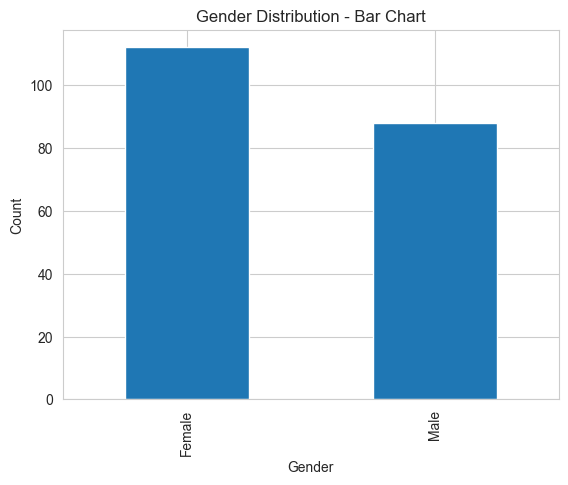

In [211]:
gender_counts.plot(kind='bar')
plt.title('Gender Distribution - Bar Chart')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Построение круговой диаграммы**

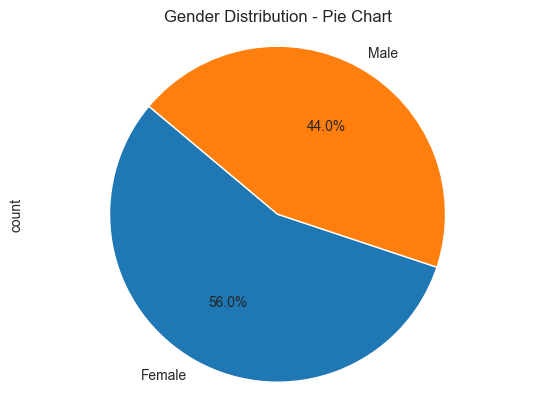

In [212]:
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution - Pie Chart')
plt.axis('equal')  # Для того, чтобы круговая диаграмма была круглой, а не эллипсоидной
plt.show()

**Задание 5.**
Визуализация возрастного распределения. Построить гистограмму, для определения распределения возрастов клиентов. Также построить блочная диаграмма (ящик с усами).

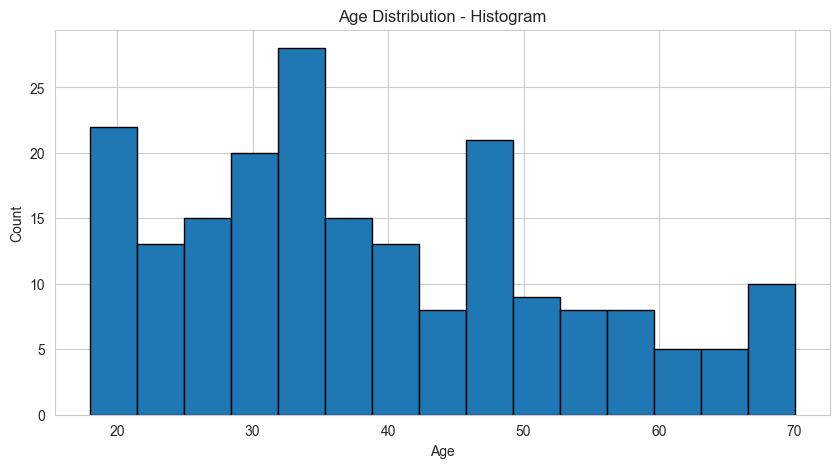

In [213]:
# Построение гистограммы
plt.figure(figsize=(10,5))
plt.hist(data['Age'], bins=15, edgecolor='black')
plt.title('Age Distribution - Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Построение блочной диаграммы (ящик с усами)**

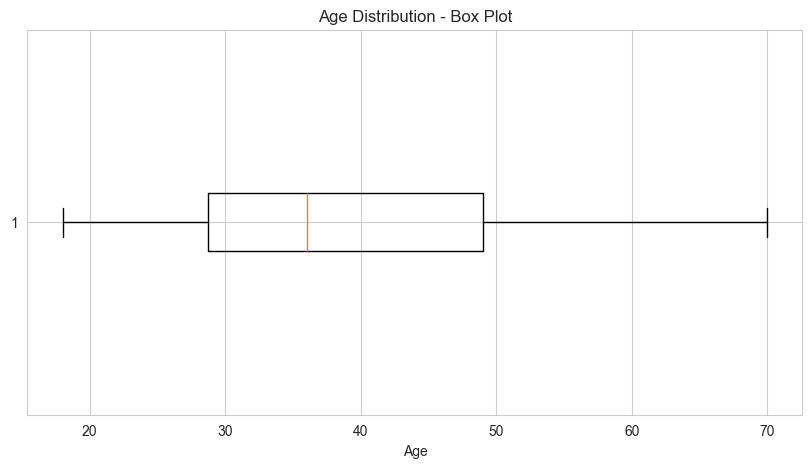

In [214]:
plt.figure(figsize=(10,5))
plt.boxplot(data['Age'], vert=False)
plt.title('Age Distribution - Box Plot')
plt.xlabel('Age')
plt.show()

**Задание 6.**
Анализ годового дохода клиентов. Построить гистограмму, затем рассмотреть эти данные с помощью графика плотности.

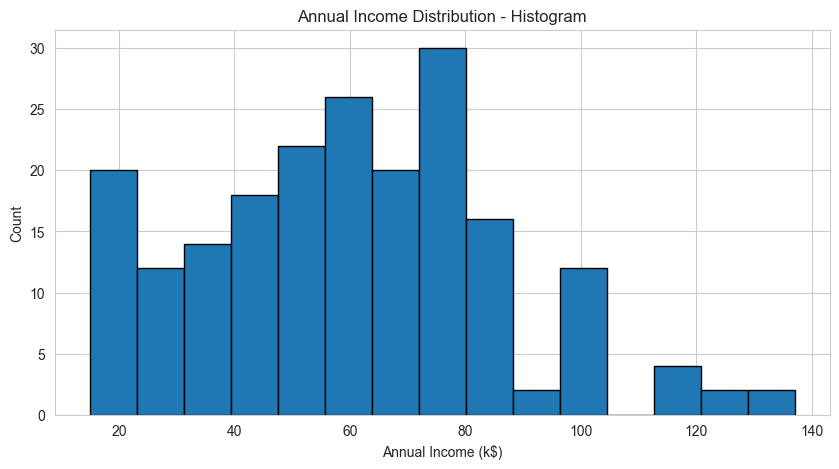

In [215]:
# Построение гистограммы
plt.figure(figsize=(10,5))
plt.hist(data['Annual Income (k$)'], bins=15, edgecolor='black')
plt.title('Annual Income Distribution - Histogram')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

Построение графика плотности

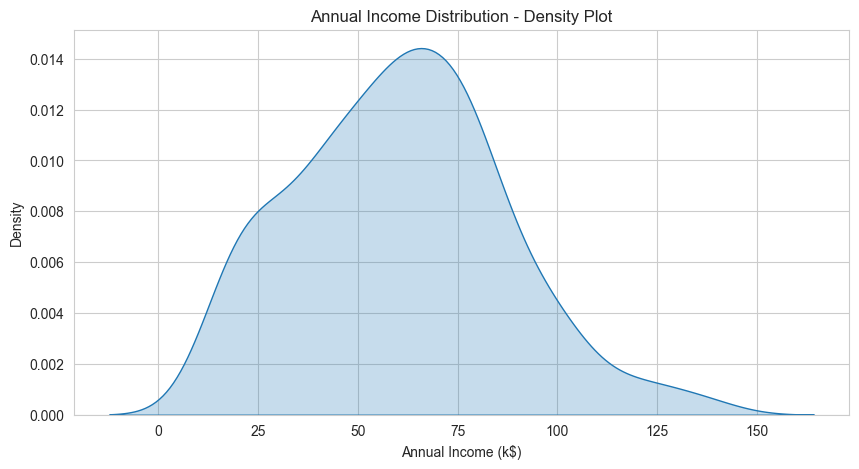

In [216]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['Annual Income (k$)'], fill=True)
plt.title('Annual Income Distribution - Density Plot')
plt.xlabel('Annual Income (k$)')
plt.show()

**Задание 7.**
Анализ оценки расходов клиентов. Проанализировать расходы, используя различные графики.

**Построение гистограммы**

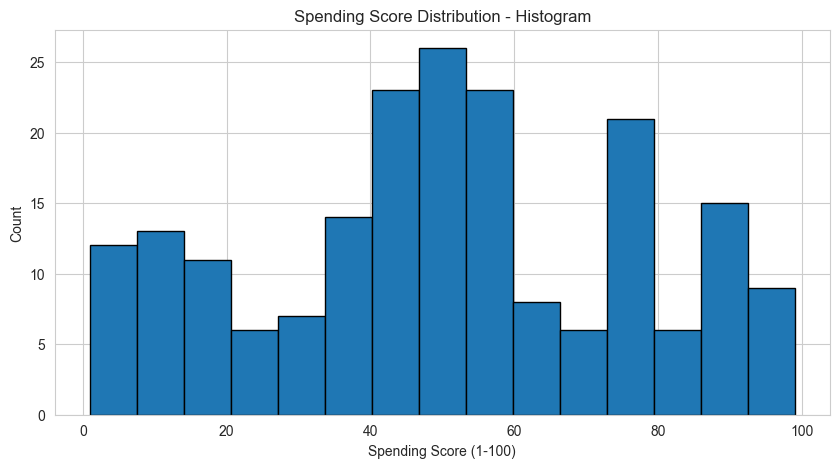

In [217]:
plt.figure(figsize=(10,5))
plt.hist(data['Spending Score (1-100)'], bins=15, edgecolor='black')
plt.title('Spending Score Distribution - Histogram')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

**Построение блочной диаграммы (ящик с усами)**

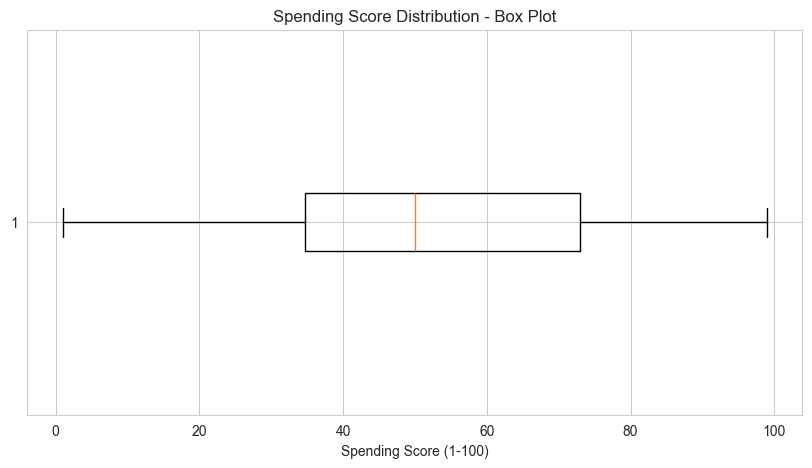

In [218]:
plt.figure(figsize=(10,5))
plt.boxplot(data['Spending Score (1-100)'], vert=False)
plt.title('Spending Score Distribution - Box Plot')
plt.xlabel('Spending Score (1-100)')
plt.show()

**Построение графика плотности**

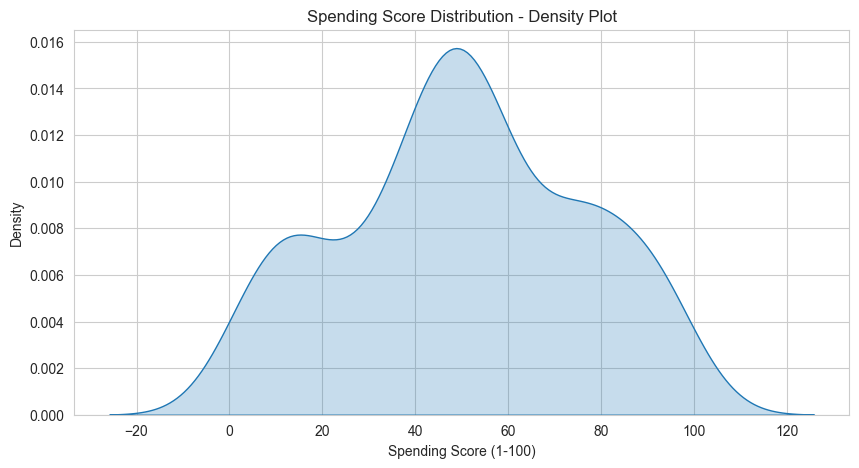

In [219]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['Spending Score (1-100)'], fill=True)
plt.title('Spending Score Distribution - Density Plot')
plt.xlabel('Spending Score (1-100)')
plt.show()

**Построение диаграммы рассеяния возраста относительно оценки расходов**

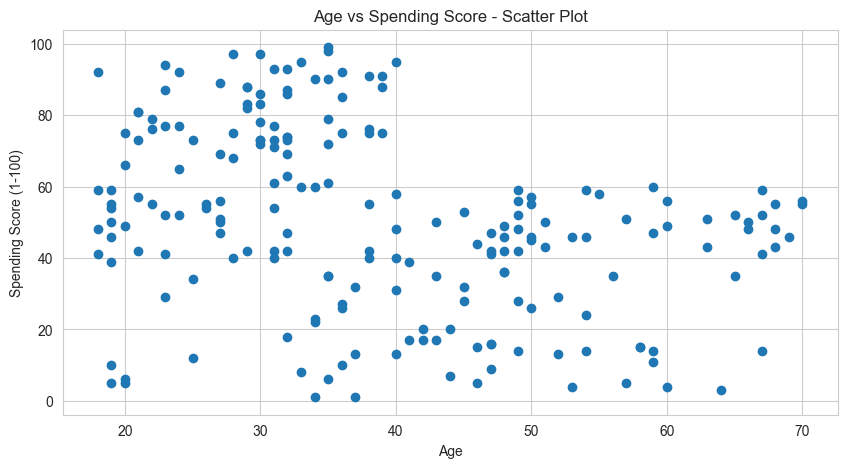

In [220]:
plt.figure(figsize=(10,5))
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.title('Age vs Spending Score - Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Задание 8.**
Используя алгоритм K-средних, изменяя различные его параметры, определить оптимальное количество кластеров

In [221]:
# Подготовка данных
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Вычисление WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sil_scores = []
for i in range(2, 11):  # начинаем с 2, так как силуэтный коэффициент требует минимум 2 кластера
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)

print(wcss)
print(sil_scores)

[269981.27999999997, 181363.595959596, 106348.37306211119, 73679.78903948836, 44448.45544793371, 37265.86520484347, 30259.657207285465, 25050.832307547527, 21862.09267218289, 19657.783608703958]
[0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.5379675585622219, 0.5264283703685728, 0.45544193969058644, 0.4553729779390266, 0.44760979994374317]


**Задание 9.**
Осуществить визуализацию результатов кластеризации

Метода локтя
На графике метода локтя, точка, где кривая начинает замедляться и становится более горизонтальной, представляет собой "локоть" и указывает на оптимальное количество кластеров.

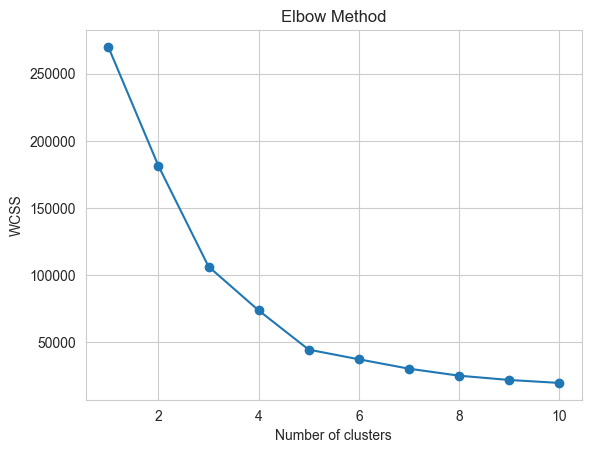

In [222]:
# Построение графика метода локтя
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Метод силуэта
метод вычисляет силуэтный коэффициент для каждого объекта, который является мерой того, насколько объект похож на свой собственный кластер по сравнению с другими кластерами. Силуэтный коэффициент варьируется от -1 до 1. Если коэффициент близок к 1, объект хорошо сгруппирован в своем кластере. Если коэффициент близок к -1, объект плохо сгруппирован.

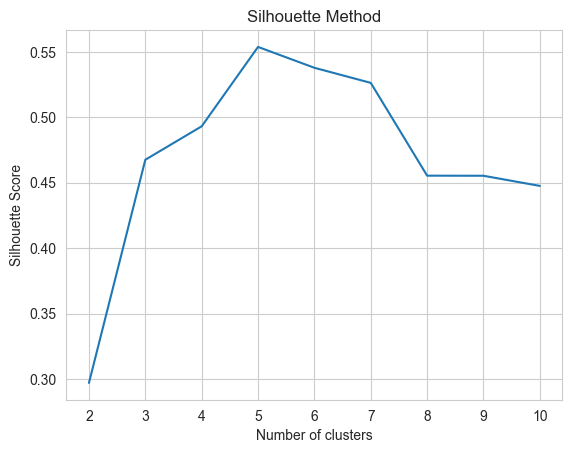

In [223]:
# Построение графика метода силуэта
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

/Users/argonauttz/pythonProject/KUBSU-ML/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


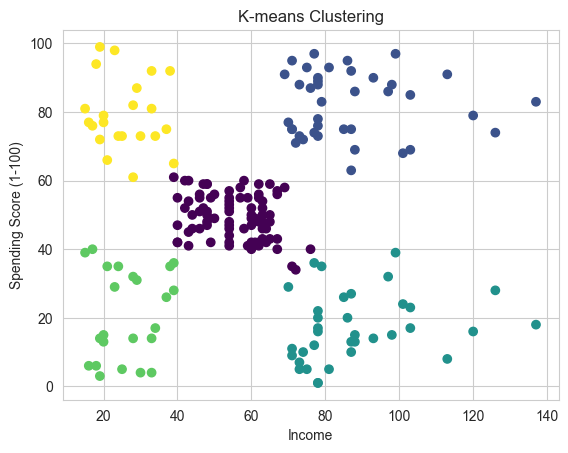

In [224]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.show()